# Computer Vision - HW02
<font color='Green' size='4'>Mohammad Doosti Lakhani - 98722278</font>

This notebooks consists of:
1. Combining Amplitude and Phase of Two Images
    1. Load two different grayscale images
    2. Transform to frequency domain using Fourier
    3. Create two image by combining phase and amplitude of transformed images
    4. Does amplitude or phase have more information in frequency domain? why?
2. Hybrid Images
    1. Load two different grayscale images
    2. Transform to frequency domain using Fourier
    3. Extract low and high frequencies of images using a low-pass and a high-pass Gaussian filter using identical *D0*
    4. Combine extracted frequencies by adding up and inverse Fourier to get spatial image
    5. Does it make a difference by looking from close or far? why?
3. *D0* Effect
    1. In the task 2, instead of using identical *D0* use higher values for high-pass and vice versa.
    2. Does it make the image to look better subjectively? why?

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 1 Combining Amplitude and Phase of Two Images
1. Load two different grayscale images
2. Transform to frequency domain using Fourier
3. Create two image by combining phase and amplitude of transformed images
4. Does amplitude or phase have more information in frequency domain? why?

### 1.A Load two different grayscale images

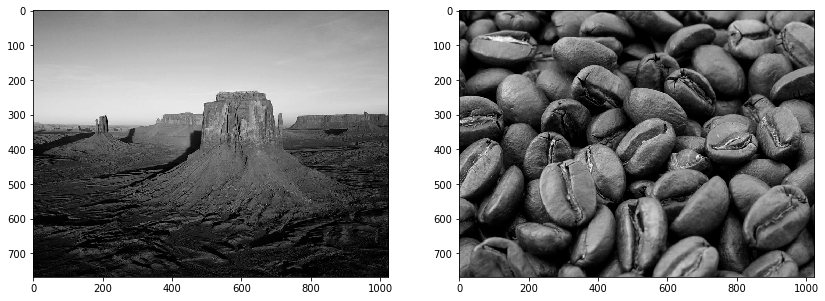

In [133]:
desert = cv2.imread('images/desert.jpg', 0)
coffee = cv2.imread('images/coffee.jpg', 0)

plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(desert, cmap='gray')
plt.subplot(122)
plt.imshow(coffee, cmap='gray')
plt.show()

### 1.B Transform to frequency domain using Fourier

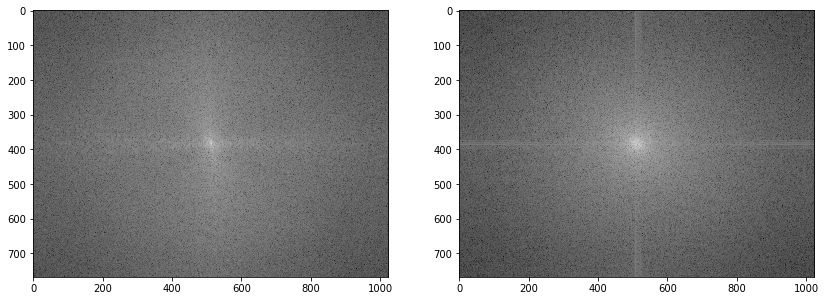

In [134]:
desert_fft = np.fft.fftshift(np.fft.fft2(desert))
coffee_fft = np.fft.fftshift(np.fft.fft2(coffee))

plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(np.abs(desert_fft)), cmap='gray')
plt.subplot(122)
plt.imshow(np.log(np.abs(coffee_fft)), cmap='gray')
plt.show()

### 1.C Create two image by combining phase and amplitude of transformed images
As we know, Fourier gives us two matrix with the same shape of image, one for real numbers and the other for imaginary numbers. So we can define `amplitude = np.sqrt(real ** 2 + imaginary ** 2)` and `phase = np.arctan2(imaginary / real)`.

In [141]:
desert_amplitude = np.sqrt(np.real(desert_fft) ** 2 + np.imag(desert_fft) ** 2)
desert_phase = np.arctan2(np.imag(desert_fft), np.real(desert_fft))
coffee_amplitude = np.sqrt(np.real(coffee_fft) ** 2 + np.imag(coffee_fft) ** 2)
coffee_phase = np.arctan2(np.imag(coffee_fft), np.real(coffee_fft))

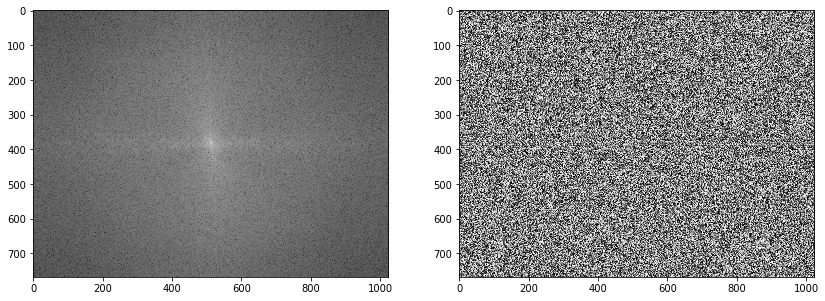

In [142]:
plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(desert_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(desert_phase, cmap='gray')

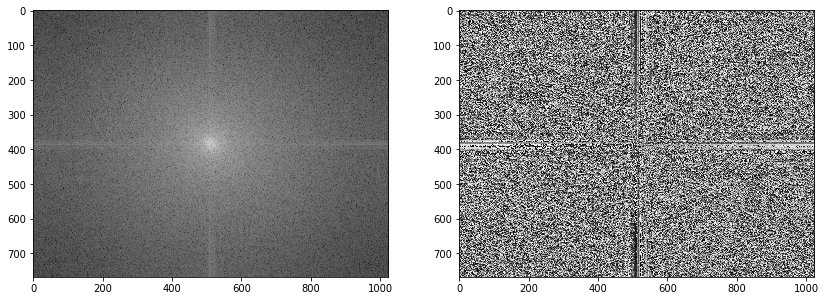

In [140]:
plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(coffee_amplitude+1e-10), cmap='gray')
plt.subplot(122)
plt.imshow(coffee_phase, cmap='gray')

We can get image by computing `amplitude * exp(j * phase)`

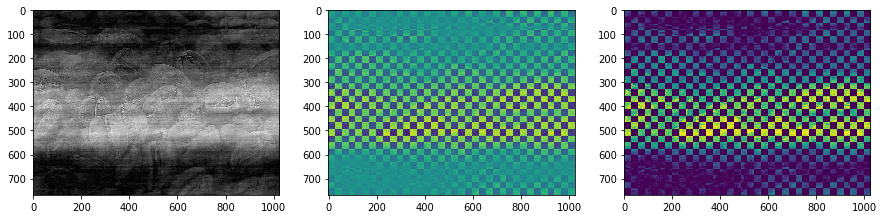

In [151]:
# amplitude_phase
desert_coffee_comb = np.multiply(desert_amplitude, np.exp(1j * coffee_phase))
desert_coffee = np.real(np.fft.ifft2(desert_coffee_comb))  # drop imagniary as they are around 1e-14

# combined image has values < 0 and > 1, needs to be scaled.
plt.figure(figsize=(15, 20))
plt.subplot(131)
plt.imshow(np.abs(desert_coffee), cmap='gray')
plt.subplot(132)
desert_coffee_shift = desert_coffee + desert_coffee.min()
desert_coffee_shift[desert_coffee_shift>255] = 255
plt.imshow(desert_coffee_shift)
plt.subplot(133)
desert_coffee[desert_coffee>255] = 255
desert_coffee[desert_coffee <0] = 0
plt.imshow(desert_coffee)

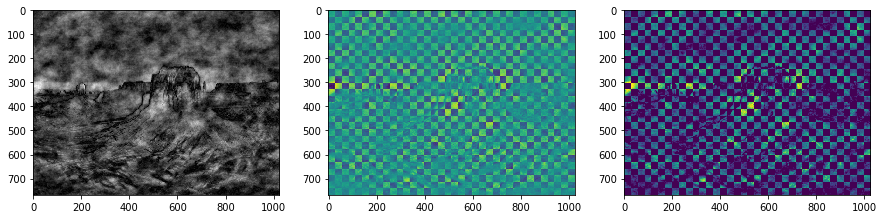

In [152]:
# amplitude_phase
coffee_desert_comb = np.multiply(coffee_amplitude, np.exp(1j * desert_phase))
coffee_desert = np.real(np.fft.ifft2(coffee_desert_comb))  # drop imagniary as they are around 1e-14

# combined image has values < 0 and > 1, needs to be scaled.
plt.figure(figsize=(15, 20))
plt.subplot(131)
plt.imshow(np.abs(coffee_desert), cmap='gray')
plt.subplot(132)
coffee_desert_shift = coffee_desert + coffee_desert.min()
coffee_desert_shift[coffee_desert_shift>255] = 255
plt.imshow(coffee_desert_shift)
plt.subplot(133)
coffee_desert[coffee_desert>255] = 255
coffee_desert[coffee_desert <0] = 0
plt.imshow(coffee_desert)

### 1.D Does amplitude or phase have more information in frequency domain? why?

As we can see in the obtained images, the dominant factor is the phase. The reason is the amplitude is only the intensity without considering the position of that intensity, so it does not contain any spatial information. On the other side, phase is all about how those intensities lied in juxtapose to each other which means the spatial information which matters to us most. An instance to this exaplanation could be the edges that can be found throughout the phase info not the amplitude.

## 2 Hybrid Images
1. Load two different grayscale images
2. Transform to frequency domain using Fourier
3. Extract low and high frequencies of images using a low-pass and a high-pass Gaussian filter using identical *D0*
4. Combine extracted frequencies by adding up and inverse Fourier to get spatial image
5. Does it make a difference by looking from close or far? why?

### 2.A Load two different grayscale images

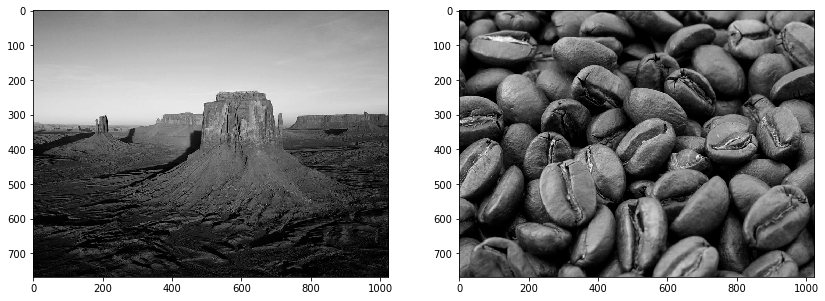

In [3]:
desert = cv2.imread('images/desert.jpg', 0)
coffee = cv2.imread('images/coffee.jpg', 0)

plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(desert, cmap='gray')
plt.subplot(122)
plt.imshow(coffee, cmap='gray')
plt.show()

### 2.B Transform to frequency domain using Fourier

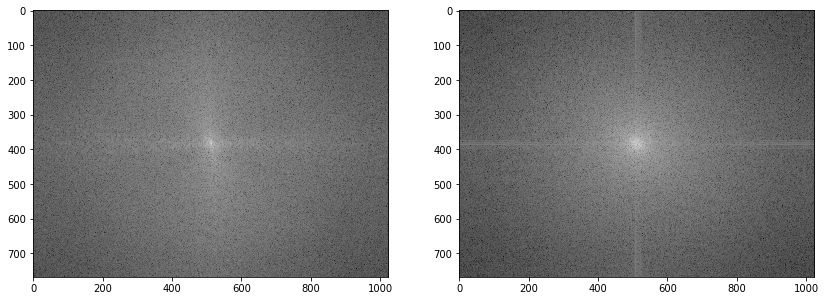

In [17]:
desert_fft = np.fft.fftshift(np.fft.fft2(desert))
coffee_fft = np.fft.fftshift(np.fft.fft2(coffee))

plt.figure(figsize=(14, 18))
plt.subplot(121)
plt.imshow(np.log(np.abs(desert_fft)), cmap='gray')
plt.subplot(122)
plt.imshow(np.log(np.abs(coffee_fft)), cmap='gray')
plt.show()

### 2.C Extract low and high frequencies of images using a low-pass and a high-pass Gaussian filter using identical *D0*

In [4]:
def gaussian(r2, std=1):
    """
    Sample one instance from gaussian distribution regarding
    given squared-distance:r2, standard-deviation:std and general-constant:k

    :param r: squared distance from center of gaussian distribution
    :param std: standard deviation

    :return: A sampled number obtained from gaussian
    """
    return np.exp(-r2/(2.*std**2)) / (2.*np.pi*std**2)
def make_gaussian(std=1, size=None):
    """
    Creates a gaussian kernel regarding given size and std.
    Note that to define interval with respect to the size, 
    I used linear space sampling which may has
    lower accuracy from renowned libraries.

    :param std: standard deviation value
    :param size: size of the output kernel
    :return: A gaussian kernel with size of (size*size)
    """
    if size is None:
        size = np.floor(6 * std)
        if size % 2 == 0:
            size = size - 1
        else:
            size= size - 2
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    distance = x**2+ y**2
    kernel = gaussian(r2=distance, std=std)
    return kernel / kernel.sum()

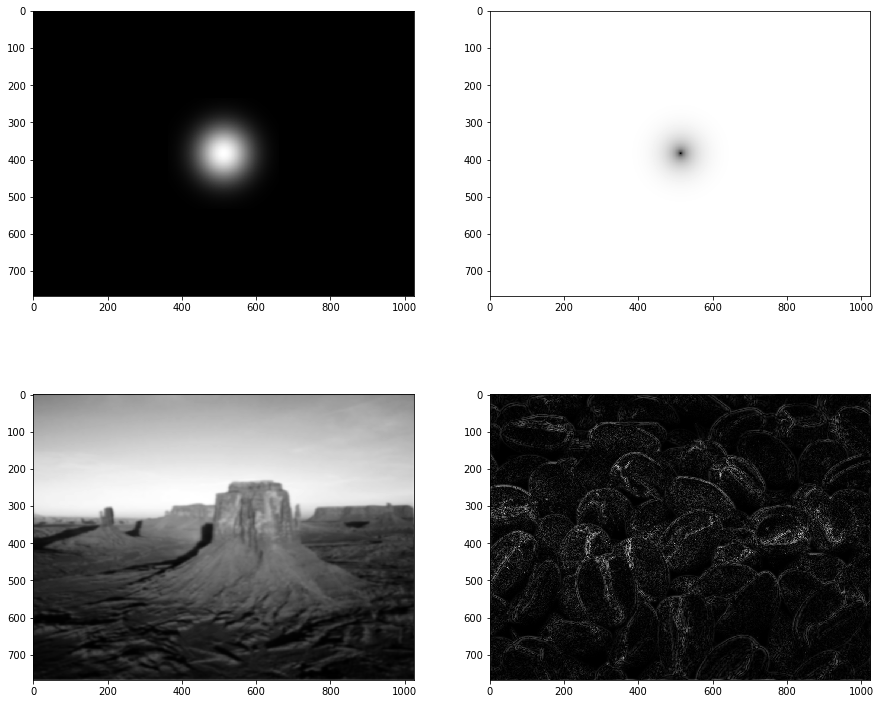

In [105]:
cutoff_lpf = 50
cutoff_hpf = 50

lpf = make_gaussian(cutoff_lpf)
hpf = lpf.max() - lpf

plt.figure(figsize=(15, 20))

lpf = np.pad(lpf, [(desert.shape[0]//2-lpf.shape[0]//2,
                  desert.shape[0]//2-lpf.shape[0]//2 - 1),
                 (desert.shape[1]//2-lpf.shape[1]//2,
                  desert.shape[1]//2-lpf.shape[1]//2 - 1)], mode='constant', constant_values=0)

hpf = np.pad(hpf, [(desert.shape[0]//2-hpf.shape[0]//2,
                  desert.shape[0]//2-hpf.shape[0]//2 - 1),
                 (desert.shape[1]//2-hpf.shape[1]//2,
                  desert.shape[1]//2-hpf.shape[1]//2 - 1)], mode='constant', constant_values=lpf.max())

desert_lpf = np.fft.ifft2(np.multiply(desert_fft, lpf))
coffee_hpf = np.fft.ifft2(np.multiply(coffee_fft, hpf))

plt.subplot(321)
plt.imshow(lpf, cmap='gray')
plt.subplot(322)
plt.imshow(np.log(np.abs(hpf)), cmap='gray')
plt.subplot(323)
plt.imshow(np.abs(desert_lpf), cmap='gray')
plt.subplot(324)
plt.imshow(np.abs(coffee_hpf), cmap='gray')

### 2.D Combine extracted frequencies by adding up and inverse Fourier to get spatial image

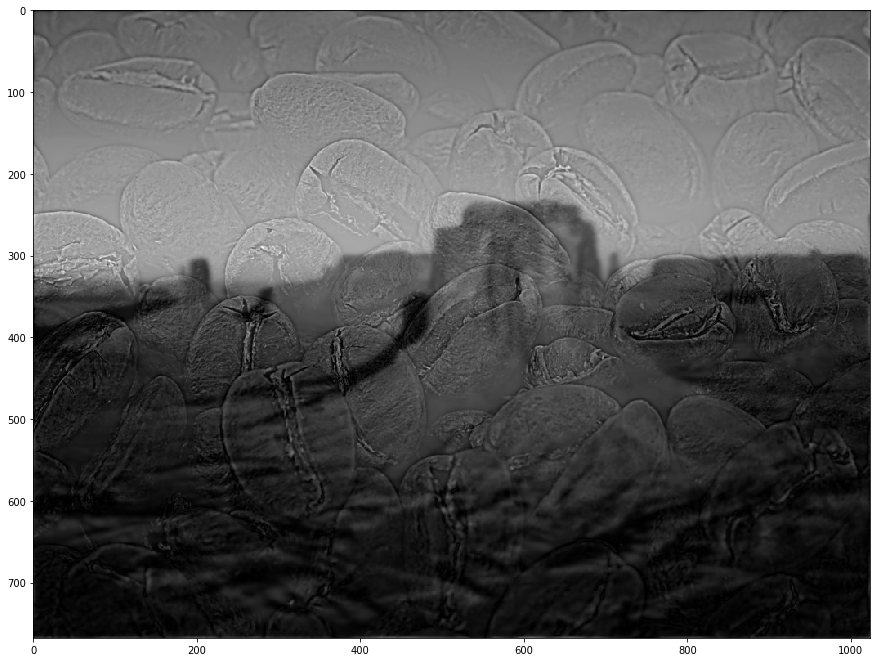

In [106]:
combined = np.fft.ifft2(np.multiply(desert_fft, lpf) + np.multiply(coffee_fft, hpf))
plt.figure(figsize=(15, 20))
plt.imshow(np.abs(combined), cmap='gray')

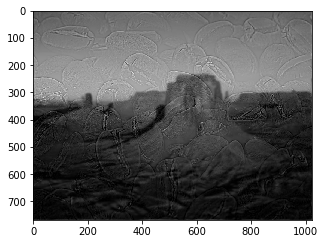

In [107]:
plt.figure(figsize=(5, 8))
plt.imshow(np.abs(combined), cmap='gray')

### 2.E Does it make a difference by looking from close or far? why?

Yes, as we can see the above images, (produced using zooming which corresponds to subsampling and the way our eye works, so no longer needs to we change our distance somehow!)

The answer is related to subsampling and zooming images to original size. When we subsample, we loose high freq data so by getting far from the image, we loose high freq too because of our eyes' power, and by getting closer to image, we can see more details which means more high freq data. On the other hand, the image is constructed using high freq from coffee and low freq from desert. So getting far means low freq and low freq means desert data, and getting closer means high freq and high freq means coffee data.

## 3 *D0* Effect
1. In the task 2, instead of using identical *D0* use higher values for high-pass and vice versa.
2. Does it make the image to look better subjectively? why?

### 3.A In the task 2, instead of using identical D0 use higher values for high-pass and vice versa

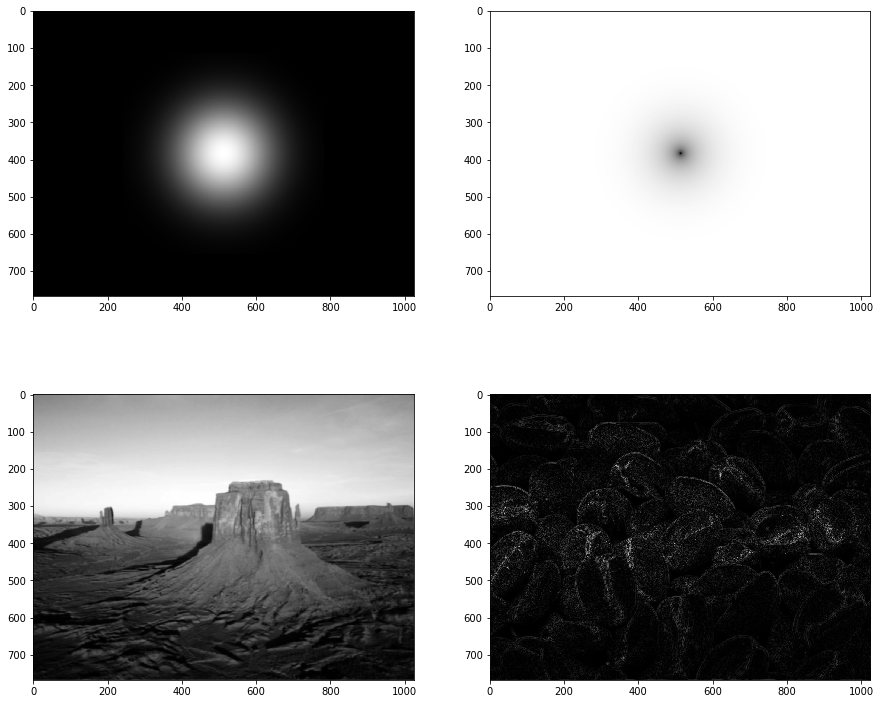

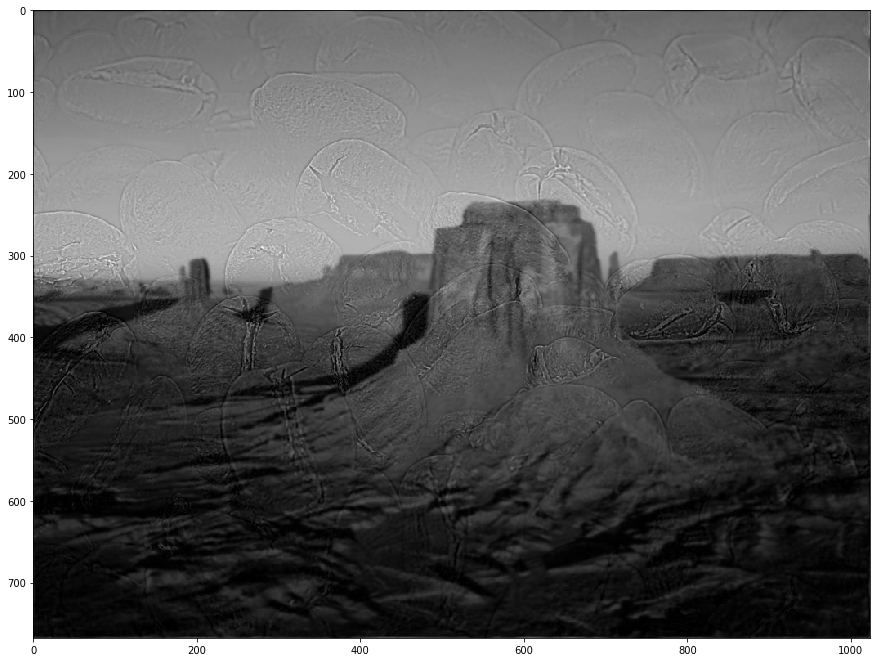

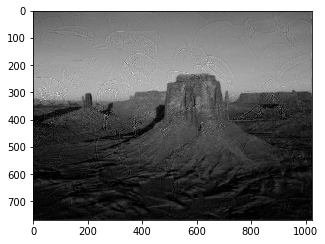

In [118]:
cutoff_lpf = 90
cutoff_hpf = 60

lpf = make_gaussian(cutoff_lpf)
hpf = lpf.max() - lpf

plt.figure(figsize=(15, 20))

lpf = np.pad(lpf, [(desert.shape[0]//2-lpf.shape[0]//2,
                  desert.shape[0]//2-lpf.shape[0]//2 - 1),
                 (desert.shape[1]//2-lpf.shape[1]//2,
                  desert.shape[1]//2-lpf.shape[1]//2 - 1)], mode='constant', constant_values=0)

hpf = np.pad(hpf, [(desert.shape[0]//2-hpf.shape[0]//2,
                  desert.shape[0]//2-hpf.shape[0]//2 - 1),
                 (desert.shape[1]//2-hpf.shape[1]//2,
                  desert.shape[1]//2-hpf.shape[1]//2 - 1)], mode='constant', constant_values=lpf.max())

desert_lpf = np.fft.ifft2(np.multiply(desert_fft, lpf))
coffee_hpf = np.fft.ifft2(np.multiply(coffee_fft, hpf))

plt.subplot(321)
plt.imshow(lpf, cmap='gray')
plt.subplot(322)
plt.imshow(np.log(np.abs(hpf)), cmap='gray')
plt.subplot(323)
plt.imshow(np.abs(desert_lpf), cmap='gray')
plt.subplot(324)
plt.imshow(np.abs(coffee_hpf), cmap='gray')

combined = np.fft.ifft2(np.multiply(desert_fft, lpf) + np.multiply(coffee_fft, hpf))
plt.figure(figsize=(15, 20))
plt.imshow(np.abs(combined), cmap='gray')
plt.figure(figsize=(5, 8))
plt.imshow(np.abs(combined), cmap='gray')

### 3.B Does it make the image to look better subjectively? why?

 First of all using low cutoff for any of the high pass or low pass filters will cause the other one dominate the output so even in different distances, the filter with higher cutoff (more info) is more visible so we need to consider much more closer or far distances to see the different images.

Meanwhile, in the final output image which has been optained by using *100 for highpass* and *70 for lowpass*, we can see the in the far mode, the low pass image is more visible.

But I have tested many different values and subjectively, I cannot say choosing a higher value for highpass filter make the output a better image because it may depend on image and its particular frequency distribution.

Here is the [FAQ page of ImageJ](https://imagej.net/Thresholding): "In short, you can't. It will always be, to some extent, in the eye of the user/observer/scientist and will also be impacted by empirically collected knowledge. The basic problem of deciding if a threshold (or in general an extraction method) is "good" needs a "ground truth". But such a ground truth is not naturally existing and is always created in one or the other way by a human."